In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_power


pi= np.pi
wavelength = 1/2000000  #500nm 
k0=2*pi / wavelength

In [3]:
def rp(n1, n2):                       #equations simplify to these at normal incidence
    return (n2 - n1) / (n2 + n1)
    
def rs(n1, n2):       
    return (n1 - n2) /  (n1 + n2)

def t(n1, n2):  #t_p = t_s at normal incidence
    return (2*n1)/ (n1+n2)

In [4]:
def I(n_a, n_b):         
    x= (1/t(n_a, n_b))
    y = np.array(([1, rp(n_a, n_b)], [rp(n_a, n_b), 1]))
    
    return np.multiply(x,y)   #this is working and returning the correct array

In [5]:
def r(n0,n_h,n_l,n_s,p):     #should give the matrix from which we can find r and t
    L = np.array(([-1j,0], [0,1j]))   #the phase factor matrix for when d= wvl/4n and wvl is constant     
    I_start = I(n0, n_h)             #going from air to the first layer
    I_HL = np.matmul(L, I(n_h,n_l))  #high to low
    I_LH = np.matmul(L, I(n_l,n_h))  #low to high
    I_finish = np.matmul(L, I(n_h, n_s))   #going from the last layer to the substrate
    
    Q= np.matmul(I_HL, I_LH) 
    S = np.matmul(I_start,np.matmul(matrix_power(Q,p),I_finish))
    return (S[1][0]/ S[0][0]).real 
    

In [6]:
r(1,3,2,1.5,0)

0.7142857142857142

In [7]:
a0= r(1,3,2,1.5,0)
a1= r(1,3,2,1.5,1)
a2= r(1,3,2,1.5,2)
a3= r(1,3,2,1.5,3)
a4= r(1,3,2,1.5,4)
a5= r(1,3,2,1.5,5)
a6= r(1,3,2,1.5,6)
a7= r(1,3,2,1.5,7)
a8= r(1,3,2,1.5,8)
a9= r(1,3,2,1.5,9)

a10= r(1,3,2,1.5,10)
a11= r(1,3,2,1.5,11)
a12= r(1,3,2,1.5,12)
a13= r(1,3,2,1.5,13)
a14= r(1,3,2,1.5,14)
a15= r(1,3,2,1.5,15)
a16= r(1,3,2,1.5,16)
a17= r(1,3,2,1.5,17)
a18= r(1,3,2,1.5,18)
a19= r(1,3,2,1.5,19)

a20= r(1,3,2,1.5,20)

y= [a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20]

In [8]:
def R(n0,n_h,n_l,n_s, p):
    return (np.abs(r(n0,n_h,n_l,n_s, p)))**2

b0= R(1,3,2,1.5,0)
b1= R(1,3,2,1.5,1)
b2= R(1,3,2,1.5,2)
b3= R(1,3,2,1.5,3)
b4= R(1,3,2,1.5,4)
b5= R(1,3,2,1.5,5)
b6= R(1,3,2,1.5,6)
b7= R(1,3,2,1.5,7)
b8= R(1,3,2,1.5,8)
b9= R(1,3,2,1.5,9)
b10= R(1,3,2,1.5,10)
b11= R(1,3,2,1.5,11)
b12= R(1,3,2,1.5,12)
b13= R(1,3,2,1.5,13)
b14= R(1,3,2,1.5,14)
b15= R(1,3,2,1.5,15)
b16= R(1,3,2,1.5,16)
b17= R(1,3,2,1.5,17)
b18= R(1,3,2,1.5,18)
b19= R(1,3,2,1.5,19)
b20= R(1,3,2,1.5,20)

Y= [b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20]

In [9]:
R(1,3,2,1.5,2)

0.8765733877240045

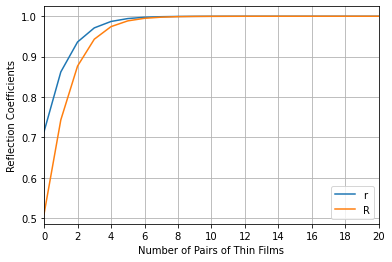

In [10]:
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

plt.plot(x,y)
plt.plot(x,Y)

plt.xlim(0,20)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
#plt.ylim(0.95,1.05)
#plt.title('')

plt.ylabel('Reflection Coefficients')
plt.xlabel('Number of Pairs of Thin Films')

plt.grid()
plt.legend(['r','R'])

plt.savefig('increasing_layers')
plt.show()

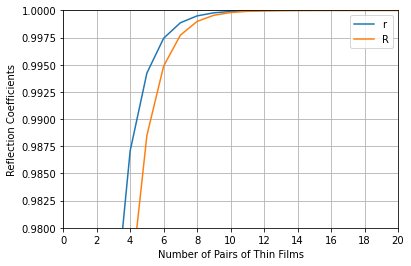

In [11]:
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

plt.plot(x,y)
plt.plot(x,Y)

plt.xlim(0,15)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.ylim(0.98,1)
#plt.title('')

plt.ylabel('Reflection Coefficients')
plt.xlabel('Number of Pairs of Thin Films')

plt.grid()
plt.legend(['r','R'])

plt.savefig('increasing_layers2')
plt.show()

In [12]:
L = np.array(([-1j,0], [0,1j]))

In [13]:
I_start = I(1, 3)   
I_start

array([[2., 1.],
       [1., 2.]])

In [14]:
I_HL = np.matmul(L, I(3,2)) 
I_HL

array([[0.-0.83333333j, 0.+0.16666667j],
       [0.-0.16666667j, 0.+0.83333333j]])

In [15]:
I_LH = np.matmul(L, I(2,3)) 
I_LH

array([[0.-1.25j, 0.-0.25j],
       [0.+0.25j, 0.+1.25j]])

In [16]:
I_finish = np.matmul(L, I(3, 1.5))
I_finish

array([[0.-0.75j, 0.+0.25j],
       [0.-0.25j, 0.+0.75j]])